In [4]:
import os
import torch
import matplotlib.pyplot as plt

In [5]:
model = torch.load("../model/" + os.listdir("../model/", )[-1]).to("cpu")

In [7]:
def prev(model, image, t):
    t = t * torch.ones(1, dtype=torch.int32)

    alpha = model.noise_scheduler.alphas[t]
    sqrt_oneminus_alpha_bar = model.noise_scheduler.sqrt_oneminus_alpha_bar_s[t]
    sigma = model.noise_scheduler.sigmas[t]
    return (
        image - \
        ((1 - alpha) / torch.sqrt(1 - sqrt_oneminus_alpha_bar)) * model(image, t)
    ) / torch.sqrt(alpha) + sigma * torch.randn(1, 3, 218, 178)

def infer(model, y_size, x_size):
    image = torch.randn(1, 3, y_size, x_size)
    for i in range(model.noise_scheduler.steps-1, -1, -1):
        image = prev(model, image, i)
    image = image.reshape(3, 218, 178).permute(1, 2, 0).detach()
    image -= torch.min(image)
    image /= torch.max(image)

    return image

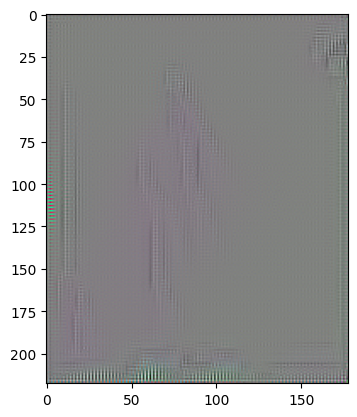

In [8]:
plt.imshow(infer(model, 218, 178))